In [1]:
#Machine Learning
#19BEC127
#19BEC131
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
import numpy as np
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree

In [2]:
#Classification of G3 in Dataset
df_mat = pd.read_csv("student-mat.csv", sep=';')
df=df_mat.copy()
# here we are assigning value 1 to marks greater than 10
# and value of 0 for marks less than 10
high = df.G3 >= 10
low = df.G3 < 10
df.loc[high,'G3'] = 1
df.loc[low,'G3'] = 0

df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,0
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,1
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,0
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,1


In [3]:
#We are changing the values to 1 and 0 s 
cleanup_nums = {"yes": 1, "no": 0, "F": 1, "M": 0, "GP": 0, "MS": 1, "R": 1, "U" : 0, "GT3": 1, "LE3" :0, "A":1, "T":0,'mother': 0, 'father': 1, 'other': 2,'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4,'home':0, 'school':1 ,'reputation':2, 'course':3}
df.replace(cleanup_nums, inplace=True)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,1,18,0,1,1,4,4,3,0,...,4,3,4,1,1,3,6,5,6,0
1,0,1,17,0,1,0,1,1,3,4,...,5,3,3,1,1,3,4,5,5,0
2,0,1,15,0,0,0,1,1,3,4,...,4,3,2,2,3,3,10,7,8,1
3,0,1,15,0,1,0,4,2,1,2,...,3,2,2,1,1,5,2,15,14,1
4,0,1,16,0,1,0,3,3,4,4,...,4,3,2,1,2,5,4,6,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,0,20,0,0,1,2,2,2,2,...,5,5,4,4,5,4,11,9,9,0
391,1,0,17,0,0,0,3,1,2,2,...,2,4,5,3,4,2,3,14,16,1
392,1,0,21,1,1,0,1,1,4,4,...,5,5,3,3,3,3,3,10,8,0
393,1,0,18,1,0,0,3,2,2,4,...,4,4,1,3,4,5,0,11,12,1


In [4]:
#KNN
x = df.values[:,0:31]
y = df.values[:,32]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,shuffle=False)
#Shuffle set to false, allows you to use the previously trained data
KNN= KNeighborsClassifier()
KNN.fit(x_train,y_train)
y_pred=KNN.predict(x_test)
f1 = metrics.f1_score(y_test, y_pred, average='macro')
accuracy = metrics.accuracy_score(y_test, y_pred)*100
print('\n\n\nAccuracy : '+str(accuracy)+'\nf1 score is: ',f1)
print ('The confusion matrix ')
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)




Accuracy : 85.71428571428571
f1 score is:  0.8265157362147328
The confusion matrix 
[[26 11]
 [ 6 76]]


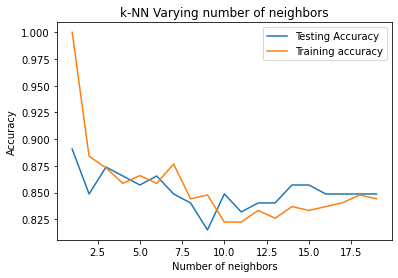

In the above plot as we can see that 
 
1)training accuracy is always greater than testing 

2)as we have 2 class to classify our data in so accuracy decreases at even n.o. of k 



In [5]:
neighbors= np.arange(1,20)
train_accuracy =np.empty(19) # Return a new array of given shape and type
test_accuracy = np.empty(19) #  without initializing entries.

for i,k in enumerate(neighbors): # enumerate() allows us to iterate through a sequence but it keeps track of both the index and the element.
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(x_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(x_test, y_test) 
    
#  Plotting the curv
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show() 
print("In the above plot as we can see that \n ")

print("1)training accuracy is always greater than testing \n")

print("2)as we have 2 class to classify our data in so accuracy decreases at even n.o. of k \n")

In [6]:
#Best k for training
param_grid = {'n_neighbors':np.arange(1,20)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)#cv-number of cross validation
#This is called hyperparameter optimization or hyperparameter tuning and is available in the scikit-learn 
knn_cv.fit(x_train,y_train)
#best score\n",
print("best score:",knn_cv.best_score_)
ba1=knn_cv.best_score_
print("best parameters",knn_cv.best_params_)
bp1=knn_cv.best_params_

best score: 0.8335714285714285
best parameters {'n_neighbors': 18}


In [7]:
#Best of K for testing
param_grid = {'n_neighbors':np.arange(1,20)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x_test,y_test)
#best score\n",
print("best score:",knn_cv.best_score_)
print("best parameters",knn_cv.best_params_)
ba2=knn_cv.best_score_
bp2=knn_cv.best_params_

best score: 0.8739130434782609
best parameters {'n_neighbors': 4}


In [8]:
#Best k for all dataset
param_grid = {'n_neighbors':np.arange(1,20)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x,y)
#best score\n",
print("best score:",knn_cv.best_score_)
print("best parameters",knn_cv.best_params_)
ba3=knn_cv.best_score_
bp3=knn_cv.best_params_

best score: 0.8329113924050633
best parameters {'n_neighbors': 13}


In [9]:

KNN_f= KNeighborsClassifier(n_neighbors=13)
KNN_f.fit(x_train,y_train)
y_pred=KNN_f.predict(x_test)
f1knn = metrics.f1_score(y_test, y_pred, average='macro')
#A macro-average will compute the metric independently for each class
#and then take the average hence treating all classes equally
accknn = metrics.accuracy_score(y_test, y_pred)*100
yt_knn,yp_knn= y_test,y_pred
accknn = metrics.accuracy_score(yt_knn,yp_knn)
print('Accuracy is: ',accknn)
print('\nf1 score is: ',f1knn)
#precision - true positive / assumed positive
#recall - true positive / actual positive
#f1 - score - harmonic mean of precision and recall
#macro average - sum of all the f1- score divied by the no of elements
#support - the actual number of occurences in the class
#support proportion - actual occurences / total items 
#weighted average - sum of support proporation into f1 score 
cmknn= metrics.confusion_matrix(yt_knn,yp_knn)
yt_knn,yp_knn = y_test,y_pred
print("\nClassification matrix:\n")
print(metrics.classification_report(y_test,y_pred))
print("\nConfusion matrix:\n")
print(cmknn)
cknn={"accuracy": metrics.accuracy_score(y_test,y_pred),"error": 1-metrics.accuracy_score(y_test,y_pred),"precision": metrics.precision_score(y_test,y_pred),"recall":metrics.recall_score(y_test,y_pred),"f1 Score": metrics.f1_score(y_test,y_pred)}

Accuracy is:  0.8403361344537815

f1 score is:  0.802653399668325

Classification matrix:

              precision    recall  f1-score   support

           0       0.80      0.65      0.72        37
           1       0.85      0.93      0.89        82

    accuracy                           0.84       119
   macro avg       0.83      0.79      0.80       119
weighted avg       0.84      0.84      0.84       119


Confusion matrix:

[[24 13]
 [ 6 76]]


In [10]:
#Bernoulli Naive Bayes Classifiers
clf=  BernoulliNB ()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
f1bnb = metrics.f1_score(y_test, y_pred, average='macro')
accbnb = metrics.accuracy_score(y_test, y_pred)*100
print('\n\n\nAccuracy is: '+str(accbnb)+'\n*f1 score is: ',f1bnb)


yt_knn,yp_knn= y_test,y_pred
#visualizig the confusion matrix:
print("Classification matrix:",metrics.classification_report(y_test,y_pred))
print ('Confusion matrix ')

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)
cbnb={"accuracy": metrics.accuracy_score(y_test,y_pred),"error": 1-metrics.accuracy_score(y_test,y_pred),"precision": metrics.precision_score(y_test,y_pred),"recall":metrics.recall_score(y_test,y_pred),"f1 Score": metrics.f1_score(y_test,y_pred)}




Accuracy is: 66.38655462184873
*f1 score is:  0.6133853151397011
Classification matrix:               precision    recall  f1-score   support

           0       0.46      0.49      0.47        37
           1       0.76      0.74      0.75        82

    accuracy                           0.66       119
   macro avg       0.61      0.62      0.61       119
weighted avg       0.67      0.66      0.67       119

Confusion matrix 
[[18 19]
 [21 61]]


In [11]:
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import sklearn.metrics
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as np

In [12]:
#Decision Tree Classifiers
clf = DecisionTreeClassifier(random_state=42)
params = {
    'max_depth': np.arange(5,30),
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
grid_search = GridSearchCV(estimator=clf, 
                           param_grid=params, 
                           cv=6)
grid_search.fit(x_train, y_train)
best=grid_search.best_estimator_
print(best)
#We get the following hyperparameters after using GridSearchCV
print("Accuracy:",metrics.accuracy_score(y_test,best.predict(x_test)))
print("F1 Score:",metrics.f1_score(y_test,best.predict(x_test)))
print("\nClassification Report:\n")
print(classification_report(y_test, best.predict(x_test)))

cdt={"accuracy": metrics.accuracy_score(y_test,best.predict(x_test)),"error": 1-metrics.accuracy_score(y_test,best.predict(x_test)),"precision": metrics.precision_score(y_test,best.predict(x_test)),"recall":metrics.recall_score(y_test,best.predict(x_test)),"f1 Score": metrics.f1_score(y_test,best.predict(x_test))}

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, random_state=42)
Accuracy: 0.8739495798319328
F1 Score: 0.911242603550296

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.73      0.78        37
           1       0.89      0.94      0.91        82

    accuracy                           0.87       119
   macro avg       0.86      0.83      0.85       119
weighted avg       0.87      0.87      0.87       119

[[18 19]
 [21 61]]


In [13]:
#FOR DATASET OF STUDENT - PORTUGUESE

In [14]:
#fetching the data from csv file
df_por = pd.read_csv("student-por.csv", sep=';')
df=df_por.copy()
# if marks of student in g3 is>or equal to 10 then classify it in class 1 or else in class 0
high = df.G3 >= 10
low = df.G3 < 10
df.loc[high,'G3'] = 1
df.loc[low,'G3'] = 0

In [15]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,1
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,1
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,0
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,1


In [16]:
cleanup_nums = {"yes": 1, "no": 0, "F": 1, "M": 0, "GP": 0, "MS": 1, "R": 1, "U" : 0, "GT3": 1, "LE3" :0, "A":1, "T":0,'mother': 0, 'father': 1, 'other': 2,'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4,'home':0, 'school':1 ,'reputation':2, 'course':3}
df.replace(cleanup_nums, inplace=True)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,1,18,0,1,1,4,4,3,0,...,4,3,4,1,1,3,4,0,11,1
1,0,1,17,0,1,0,1,1,3,4,...,5,3,3,1,1,3,2,9,11,1
2,0,1,15,0,0,0,1,1,3,4,...,4,3,2,2,3,3,6,12,13,1
3,0,1,15,0,1,0,4,2,1,2,...,3,2,2,1,1,5,0,14,14,1
4,0,1,16,0,1,0,3,3,4,4,...,4,3,2,1,2,5,0,11,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,1,19,1,1,0,2,3,2,4,...,5,4,2,1,2,5,4,10,11,1
645,1,1,18,0,0,0,3,1,0,2,...,4,3,4,1,1,1,4,15,15,1
646,1,1,18,0,1,0,1,1,4,4,...,1,1,1,1,1,5,6,11,12,0
647,1,0,17,0,0,0,3,1,2,2,...,2,4,5,3,4,2,6,10,10,1


In [17]:
x = df.values[:,0:31]
y = df.values[:,32]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,shuffle=False)#splitting test and train data

In [18]:
KNN= KNeighborsClassifier()
KNN.fit(x_train,y_train)
y_pred=KNN.predict(x_test)
f1 = metrics.f1_score(y_test, y_pred, average='macro')
accuracy = metrics.accuracy_score(y_test, y_pred)*100
print("Knn classifier")
print('\nAccuracy : '+str(accuracy)+'\nf1 score is: ',f1)
print ('The confusion matrix :')
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

Knn classifier

Accuracy : 74.87179487179488
f1 score is:  0.5955555555555555
The confusion matrix :
[[ 13  46]
 [  3 133]]


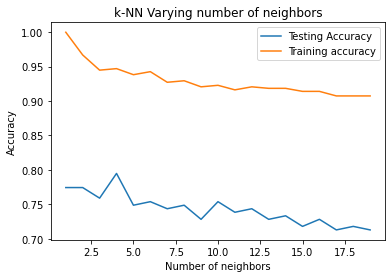

In [19]:
neighbors= np.arange(1,20)
train_accuracy =np.empty(19)
test_accuracy = np.empty(19)

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(x_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(x_test, y_test) 
    
#  Plotting the curv
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show() 

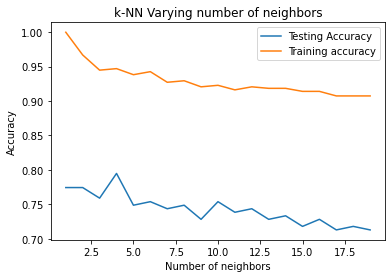

In [20]:
neighbors= np.arange(1,20)
train_accuracy =np.empty(19)
test_accuracy = np.empty(19)

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(x_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(x_test, y_test) 
    
#  Plotting the curv
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show() 

In [21]:
#training accuracy is always greater than testing
#as we have 2 class to classify our data in so accuracy decreases at even n.o. of k
param_grid = {'n_neighbors':np.arange(1,20)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x_train,y_train)
#best score\n",
print("best score:",knn_cv.best_score_)
ba1=knn_cv.best_score_
print("best parameters",knn_cv.best_params_)
bp1=knn_cv.best_params_

best score: 0.9251282051282053
best parameters {'n_neighbors': 6}


In [22]:
param_grid = {'n_neighbors':np.arange(1,20)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x_test,y_test)
#best score\n",
print("best score:",knn_cv.best_score_)
print("best parameters",knn_cv.best_params_)
ba2=knn_cv.best_score_
bp2=knn_cv.best_params_

best score: 0.7743589743589744
best parameters {'n_neighbors': 9}


In [23]:
param_grid = {'n_neighbors':np.arange(1,20)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x,y)
#best score\n",
print("best score:",knn_cv.best_score_)
print("best parameters",knn_cv.best_params_)
ba3=knn_cv.best_score_
bp3=knn_cv.best_params_

best score: 0.884412641621944
best parameters {'n_neighbors': 10}


In [24]:

KNN_f= KNeighborsClassifier(n_neighbors=6)
KNN_f.fit(x_train,y_train)
y_pred=KNN_f.predict(x_test)
f1knn = metrics.f1_score(y_test, y_pred, average='macro')
#A macro-average will compute the metric independently for each class
#and then take the average hence treating all classes equally
accknn = metrics.accuracy_score(y_test, y_pred)*100
yt_knn,yp_knn= y_test,y_pred
accknn = metrics.accuracy_score(yt_knn,yp_knn)
print('Accuracy is: ',accknn)
print('\nf1 score is: ',f1knn)

cmknn= metrics.confusion_matrix(yt_knn,yp_knn)
yt_knn,yp_knn = y_test,y_pred
print("\nClassification matrix:\n")
print(metrics.classification_report(y_test,y_pred))
print("\nConfusion matrix:\n")
print(cmknn)
cknn={"accuracy": metrics.accuracy_score(y_test,y_pred),"error": 1-metrics.accuracy_score(y_test,y_pred),"precision": metrics.precision_score(y_test,y_pred),"recall":metrics.recall_score(y_test,y_pred),"f1 Score": metrics.f1_score(y_test,y_pred)}

Accuracy is:  0.7538461538461538

f1 score is:  0.6225806451612903

Classification matrix:

              precision    recall  f1-score   support

           0       0.76      0.27      0.40        59
           1       0.75      0.96      0.85       136

    accuracy                           0.75       195
   macro avg       0.76      0.62      0.62       195
weighted avg       0.76      0.75      0.71       195


Confusion matrix:

[[ 16  43]
 [  5 131]]


In [25]:
clf=  BernoulliNB ()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
f1bnb = metrics.f1_score(y_test, y_pred, average='macro')
accbnb = metrics.accuracy_score(y_test, y_pred)*100
print('\n\n\nAccuracy is: '+str(accbnb)+'\n*f1 score is: ',f1bnb)


yt_knn,yp_knn= y_test,y_pred
#visualizig the confusion matrix:
print("Classification matrix:",metrics.classification_report(y_test,y_pred))
print (' *the confusion matrix ')

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)


cbnb={"accuracy": metrics.accuracy_score(y_test,y_pred),"error": 1-metrics.accuracy_score(y_test,y_pred),"precision": metrics.precision_score(y_test,y_pred),"recall":metrics.recall_score(y_test,y_pred),"f1 Score": metrics.f1_score(y_test,y_pred)}




Accuracy is: 70.25641025641025
*f1 score is:  0.6286446020488574
Classification matrix:               precision    recall  f1-score   support

           0       0.51      0.42      0.46        59
           1       0.77      0.82      0.79       136

    accuracy                           0.70       195
   macro avg       0.64      0.62      0.63       195
weighted avg       0.69      0.70      0.69       195

 *the confusion matrix 
[[ 25  34]
 [ 24 112]]


In [26]:
import time
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import sklearn.metrics
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import numpy as np

start_time = time.time()

In [27]:
clf = DecisionTreeClassifier(random_state=42)
params = {
    'max_depth': np.arange(5,30),
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
grid_search = GridSearchCV(estimator=clf, 
                           param_grid=params, 
                           cv=6)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=6, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29]),
                         'min_samples_leaf': [5, 10, 20, 50, 100]})

In [28]:
best=grid_search.best_estimator_
print(best)
print("Accuracy:",metrics.accuracy_score(y_test,best.predict(x_test)))
print("F1 Score:",metrics.f1_score(y_test,best.predict(x_test)))
print("\nClassification Report:\n")
print(classification_report(y_test, best.predict(x_test)))

cdt={"accuracy": metrics.accuracy_score(y_test,best.predict(x_test)),"error": 1-metrics.accuracy_score(y_test,best.predict(x_test)),"precision": metrics.precision_score(y_test,best.predict(x_test)),"recall":metrics.recall_score(y_test,best.predict(x_test)),"f1 Score": metrics.f1_score(y_test,best.predict(x_test))}
print("\nClassification Metrics:")
print(metrics.classification_report(y_test,best.predict(x_test)))
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix : ")
print(cm)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=20, random_state=42)
Accuracy: 0.8461538461538461
F1 Score: 0.8897058823529411

Classification Report:

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        59
           1       0.89      0.89      0.89       136

    accuracy                           0.85       195
   macro avg       0.82      0.82      0.82       195
weighted avg       0.85      0.85      0.85       195


Classification Metrics:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        59
           1       0.89      0.89      0.89       136

    accuracy                           0.85       195
   macro avg       0.82      0.82      0.82       195
weighted avg       0.85      0.85      0.85       195

Confusion Matrix : 
[[ 25  34]
 [ 24 112]]
